# Прв парцијален испит по Роботика 1

Датум: 14.04.2021

## Задача 3

**(25 поени)** Дадена е роботската рака од сликата. Да се определи инверзната кинематика на набљудуваниот роботски механизам со помош на геометрискиот приод.

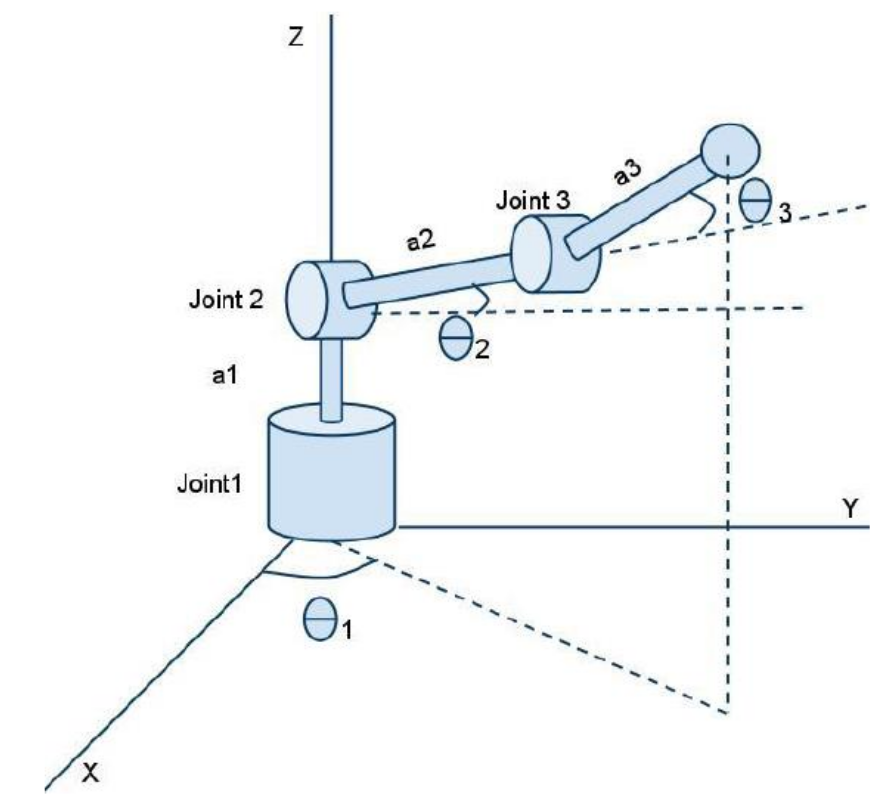

In [1]:
from IPython import display
display.Image('images/1.png', width=600)

## Решение

In [1]:
import sympy as sp
import script as rt

In [2]:
theta1,theta2,theta3,a1,a2,a3= sp.symbols('theta1,theta2,theta3,a1,a2,a3')
robot = rt.SerialLinkRobot()
robot.add_revolute_joint(theta1,a1,0,-sp.pi/2)
robot.add_revolute_joint(theta2,0,a2,0)
robot.add_revolute_joint(theta3,0,a3,0)
robot.add_subs([(a1,1),(a2,1),(a3,1)])
robot.interact()

In [3]:
T = robot.get_dh_matrix()
T

Matrix([
[cos(theta1)*cos(theta2 + theta3), -sin(theta2 + theta3)*cos(theta1), -sin(theta1), (a2*cos(theta2) + a3*cos(theta2 + theta3))*cos(theta1)],
[sin(theta1)*cos(theta2 + theta3), -sin(theta1)*sin(theta2 + theta3),  cos(theta1), (a2*cos(theta2) + a3*cos(theta2 + theta3))*sin(theta1)],
[           -sin(theta2 + theta3),             -cos(theta2 + theta3),            0,          a1 - a2*sin(theta2) - a3*sin(theta2 + theta3)],
[                               0,                                 0,            0,                                                      1]])

In [ ]:
#od tuka so aglite izveduvanje za da se dobijat teta1 teta2 i teta3
x, y, z, s1, c1, s23, c23, s2, c2 = sp.symbols('x, y, z, s1, c1, s23, c23, s2, c2')
equations = [
    (a2*c2 + a3*c23)*c1 - x,
    (a2*c2 + a3*c23)*s1 - y,
    a1-a2*s2-a3*s23-z,
    s1**2 + c1**2 - 1,
    s2**2 + c2**2 - 1,
    s23**2 + c23**2 - 1
]
solutions = sp.nonlinsolve(equations, [s1, c1, s2, c2, s23, c23])
solutions

In [ ]:
xn, yn, zn = 0.7, 0.82, 0 #primer
solutions_subs = solutions.subs([(a2, 1), (a3, 1), (x, xn), (y, yn), (z, zn)])
solutions_subs

In [ ]:
q_values = [] #vo radijani
for i, solution in enumerate(solutions_subs):
    s1n, c1n, s12n, c12n = solution
    theta1n = sp.atan2(s1n, c1n)
    theta23n = sp.atan2(s23n, c23n)
    theta2n = sp.atan2(s2n, c2n)
    theta3n=theta23n-theta2n
    q_value = (
        float(theta1n.evalf(30)),
        float(theta2n.evalf(30)),
        float(theta3n.evalf(30)),
    )
    q_values.append(q_value)
    print(f'Решение {i+1} {q_value}')

In [ ]:
q_values = [] #vo stepeni
for i, solution in enumerate(solutions_subs):
    s1n, c1n, s12n, c12n = solution
    theta1n = sp.deg(sp.atan2(s1n, c1n))
    theta23n = sp.deg(sp.atan2(s23n, c23n))
    theta2n = sp.deg(sp.atan2(s2n, c2n))
    theta3n=theta23n-theta2n
    q_value = (
        float(theta1n.evalf(30)),
        float(theta2n.evalf(30)),
        float(theta3n.evalf(30)),
    )
    q_values.append(q_value)
    print(f'Решение {i+1} {q_value}')